In [11]:
import sys
# sys.path.append("/home/federico/programming/CM/")
sys.path.append("/home/federico/Desktop/University/CM/")

In [12]:
import time
import random
from datetime import datetime as dt

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

from src.utils import *
from src.NN.metrics import mean_squared_error
from src.LS.LS import LS
from src.LS.testLS import scaling, generic_test, generate

In [13]:
random.seed(42) # Needed for reproducibility

In [14]:
def plot_stats(time_qr_np, time_qr_a3, time_ls_np, time_ls_a3, mrange, n, save=False):
    
    m = mrange.stop
    
    # --- Plotting QR stats ---
    plt.plot(mrange, time_qr_np, "^-", label="np")
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"QR factorizzation of a matrix {mrange}x{n} (NP)")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/QRscaling_np_n{n}m{m}.png")
    else: plt.show()
    plt.clf()

    plt.plot (mrange, time_qr_a3, "o-", label="mio")
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"QR factorizzation of a matrix {m}x{n} (A3)")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/QRscaling_a3_n{n}m{m}.png")
    else: plt.show()
    plt.clf()
    
    plt.plot(mrange, time_qr_np, "^-", label="np")
    plt.plot (mrange, time_qr_a3, "o-", label="(A3)")
    plt.legend()
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"QR factorizzation of a matrix {m}x{n}")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/QRscaling_comparison_n{n}m{m}.png")
    else: plt.show()
    plt.clf()
    
    
    # --- Plotting LS stats ---
    plt.plot(mrange, time_ls_np, "^-")
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"LS of a matrix {m}x{n} (NP)")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/LSscaling_np_n{n}m{m}.png")
    else: plt.show()
    plt.clf()

    plt.plot (mrange, time_ls_a3, "o-")
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"LS of a matrix {m}x{n} (A3)")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/LSscaling_a3_n{n}m{m}.png")
    else: plt.show()
    plt.clf()
    
    plt.plot(mrange, time_qr_np, "^-", label="np")
    plt.plot (mrange, time_qr_a3, "o-", label="(A3)")
    plt.legend()
    plt.xlabel ("m")
    plt.ylabel ("time (msec)")
    plt.title (f"LS of a matrix {m}x{n}")
    plt.gca().set_xlim ((min(mrange)-1, max(mrange)+1))

    if save: plt.savefig(f"report_tests/LS/Scaling/LSscaling_comparison_n{n}m{m}.png")
    else: plt.show()
    plt.clf()

# Scaling test

In [5]:
starting_m = 1000
last_m = 11000
n = 100
step = 1000
repeat = 20
time_qr_np, time_qr_a3, time_ls_np, time_ls_a3 = scaling(starting_m, last_m, n, step, repeat)

n=100, m=11000, t=20
m        QR A3      delta      QR np      delta      LS A3      delta      LS np      delta     
----------------------------------------------------------------------------------------------------
1000   || 211.7803 | 211.7803 |   5.3197 |   5.3197 |  43.7927 |  43.7927 |   7.5707 |   7.5707
2000   || 250.3425 |  38.5622 |   5.8133 |   0.4936 |  59.9229 |  16.1302 |   8.2119 |   0.6412
3000   || 316.1261 |  65.7835 |   8.7415 |   2.9282 |  91.2945 |  31.3716 |   9.7406 |   1.5287
4000   || 378.5112 |  62.3851 |  10.7898 |   2.0484 | 128.5159 |  37.2214 |  11.9080 |   2.1673
5000   || 443.9697 |  65.4585 |  14.1807 |   3.3909 | 163.0637 |  34.5478 |  14.0529 |   2.1449
6000   || 506.7961 |  62.8264 |  16.0960 |   1.9153 | 198.9757 |  35.9120 |  15.7327 |   1.6798
7000   || 568.6443 |  61.8482 |  19.4934 |   3.3974 | 231.5718 |  32.5962 |  17.9672 |   2.2345
8000   || 628.0768 |  59.4325 |  22.4240 |   2.9305 | 263.6919 |  32.1201 |  20.2812 |   2.3140
9000   || 685

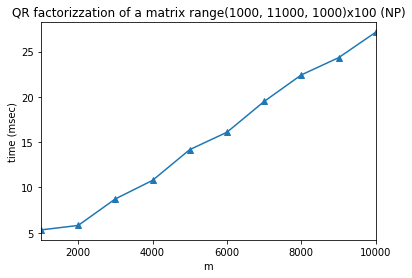

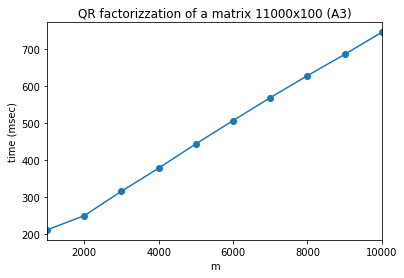

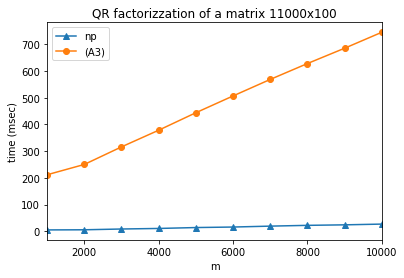

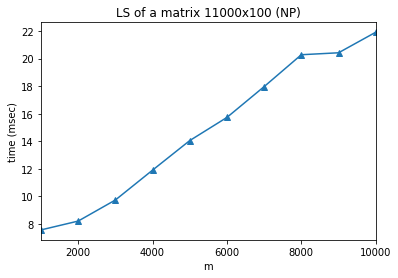

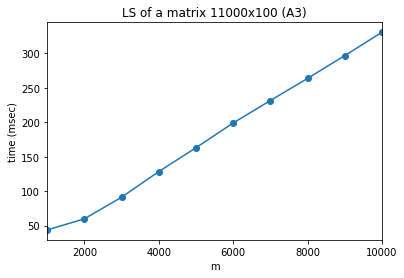

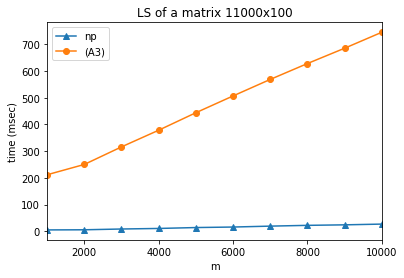

<Figure size 432x288 with 0 Axes>

In [6]:
plot_stats(time_qr_np, time_qr_a3, time_ls_np, time_ls_a3, range(starting_m, last_m, step), n, save=False)

In [7]:
starting_m = 10000
last_m = 60000
n = 100
step = 10000
repeat = 5
time_qr_np, time_qr_a3, time_ls_np, time_ls_a3 = scaling(starting_m, last_m, n, step, repeat)

n=100, m=60000, t=5
m        QR A3      delta      QR np      delta      LS A3      delta      LS np      delta     
----------------------------------------------------------------------------------------------------
10000  || 777.3606 | 777.3606 |  28.9014 |  28.9014 | 345.7790 | 345.7790 |  26.7672 |  26.7672
20000  || 2541.7730 | 1764.4124 | 158.6428 | 129.7414 | 688.6460 | 342.8670 |  86.2768 |  59.5096
30000  || 3634.8194 | 1093.0464 | 321.0092 | 162.3664 | 988.0626 | 299.4166 | 175.2448 |  88.9680
40000  || 4935.8264 | 1301.0070 | 499.3394 | 178.3302 | 1368.0166 | 379.9540 | 272.0610 |  96.8162
50000  || 5901.5824 | 965.7560 | 671.8674 | 172.5280 | 1713.7964 | 345.7798 | 360.0540 |  87.9930

m        residual A3              residual np              reconstruct a3           reconstruct np          
----------------------------------------------------------------------------------------------------
10000  ||     1.0038364913226332 |     0.9946929947309094 | 1.1564180197968884e-15

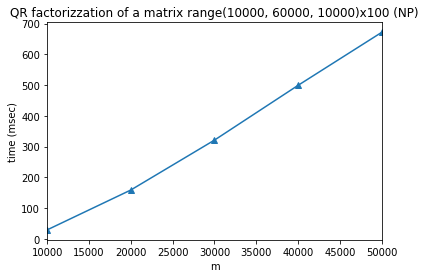

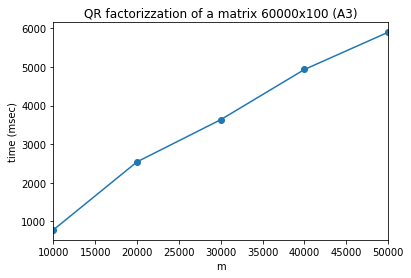

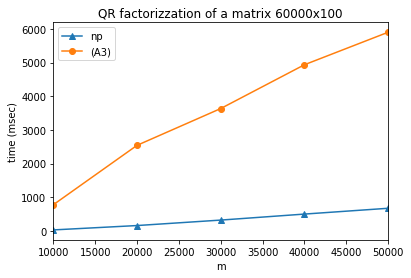

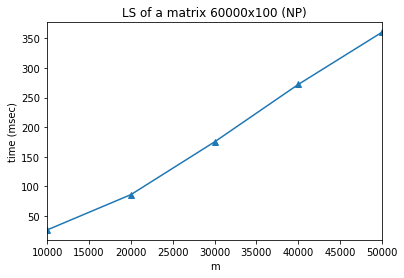

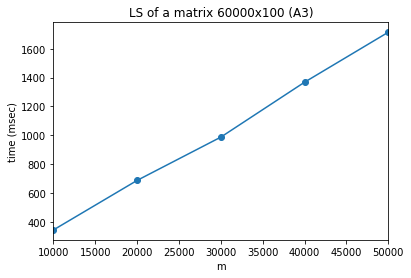

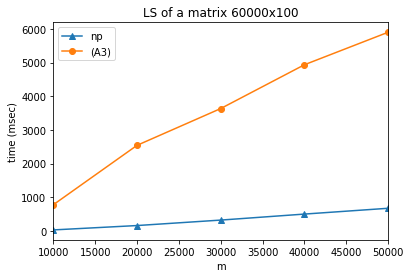

<Figure size 432x288 with 0 Axes>

In [8]:
plot_stats(time_qr_np, time_qr_a3, time_ls_np, time_ls_a3, range(starting_m, last_m, step), n, save=False)

# CUP test

In [9]:
cup = '../../data/ML-CUP20-TR.csv'

In [10]:
M, M_test, b, b_test = load_CUP(cup, split=0)
res, resnp = generic_test(M, b, 'CUP')
print(f"MSE A3: {mean_squared_error(np.matmul(M, res),b)}")
print(f"MSE np: {mean_squared_error(np.matmul(M, resnp),b)}\n\n")


A,b = generate(5000,50)
res, resnp = generic_test(A, b, 'RANDOM')
print(f"MSE A3: {mean_squared_error(np.matmul(A, res),b)}")
print(f"MSE np: {mean_squared_error(np.matmul(A, resnp),b)}")

---------- CUP DATASET ----------
Solved (m x n): (1524,10) in 1.904 msec, w/ np in 0.366 msec - Reverting and reconstruction: 3.495 msec, w/ np took: 0.429 msec
res error: 1.0537730959643323 - np_res error: 0.9962999753126452
QR error: 4.985905640396062e-16 - QR error w/ np: 3.2893174070752376e-16

MSE A3: 972.4632084924591
MSE np: 869.279035729481


---------- RANDOM DATASET ----------
Solved (m x n): (5000,50) in 42.713 msec, w/ np in 5.897 msec - Reverting and reconstruction: 131.829 msec, w/ np took: 5.324 msec
res error: 1.0051257949606285 - np_res error: 0.994796664107203
QR error: 7.736187730576775e-16 - QR error w/ np: 3.8651536202539743e-16

MSE A3: 0.4920606913668189
MSE np: 0.4819993757656366
